In [1]:
import pandas as pd
import numpy as np 

import tensorflow as tf 


2025-04-29 19:33:20.837229: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 19:33:20.845287: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 19:33:20.860355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745980400.882376    4496 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745980400.890861    4496 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745980400.916383    4496 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
import os 
bench, squat, deadlift = [], [], []
root = 'csv_files'
for subdir, dirs, files in os.walk(root):
    for f in files: 
        if 'bench' in f:
            bench.append(pd.read_csv(f'{root}/{f}'))
        elif 'squat' in f:
            squat.append(pd.read_csv(f'{root}/{f}'))
        else:
            deadlift.append(pd.read_csv(f'{root}/{f}'))

In [3]:
import random 
import matplotlib.pyplot as plt 

bench[0].axes

[RangeIndex(start=0, stop=392, step=1),
 Index(['Time', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z',
        'dt'],
       dtype='object')]

In [92]:
axes = list(bench[0].columns)
axes = axes[1:-1]
axes

['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

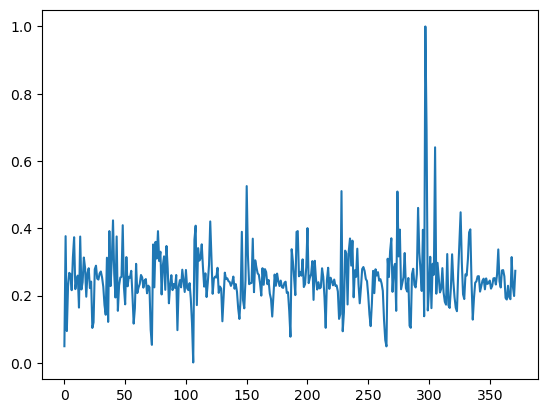

In [4]:
a = random.choice(bench)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

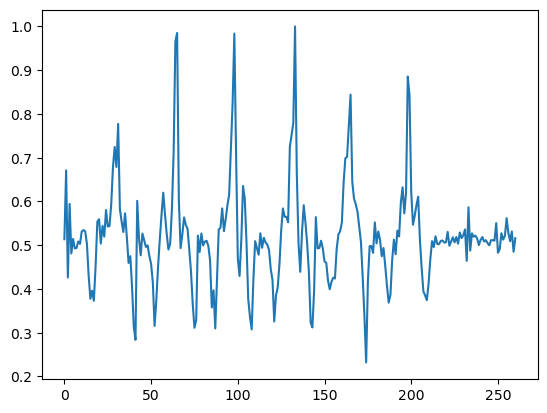

In [5]:
a = random.choice(squat)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

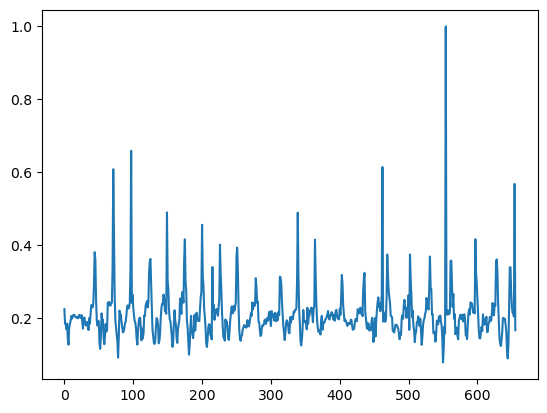

In [6]:
a = random.choice(deadlift)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

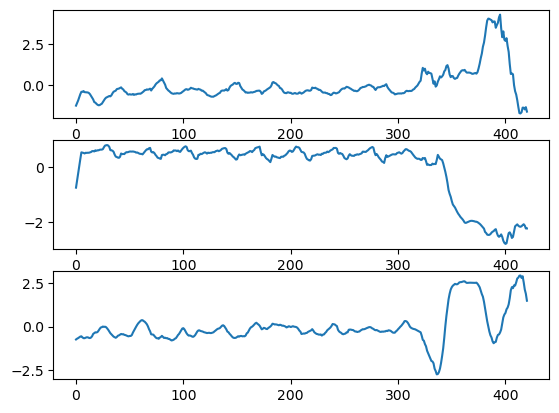

In [7]:
# for rep counting:
a = random.choice(bench)
k = 10
def normalize_1(sig):
    if isinstance(sig, pd.Series):
        sig = sig.to_numpy()
    sig = np.convolve(sig, np.ones((k, ))/k, 'same')
    return (sig - np.mean(sig))/np.std(sig)



def normalize_2(sig):
    if isinstance(sig, pd.Series):
        sig = sig.to_numpy()
    sig = np.convolve(sig, np.ones((k,))/k, 'same')
    return (sig - np.mean(sig))/np.max(np.abs(sig))

def normalize_3(sig, fs=10):
        
    sig = (sig - np.mean(sig))
    freqs = np.fft.fftfreq(len(sig), d=1/fs)
    fft_vals = np.fft.fft(sig)

    cutoff = 0.5
    fft_filtered = fft_vals.copy()
    fft_filtered[np.abs(freqs) > cutoff] = 0
    fft_filtered /= k
    out = np.fft.ifft(fft_filtered).real
    return out/np.max(np.abs(out))


plt.figure()
plt.subplot(311)
plt.plot(normalize_1(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_1(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_1(a['Accel_Z']))




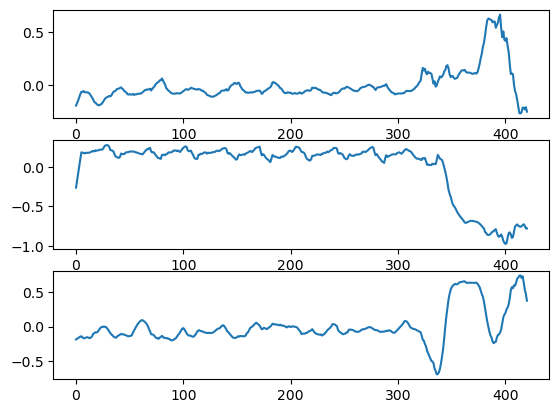

In [8]:
plt.subplot(311)
plt.plot(normalize_2(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_2(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_2(a['Accel_Z']))

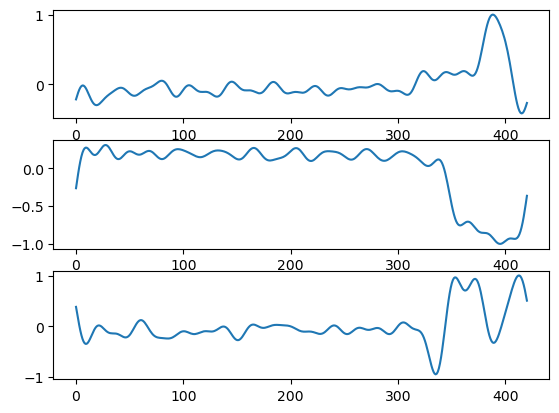

In [9]:

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))

# Rep counting

Normalization: Padding, Convolution, subtract mean, divide by either max or std, find most symmetric signal, count its x intercepts. 

subtract mean, fft, cutoff high freq, divide by constant, ifft, divide by max

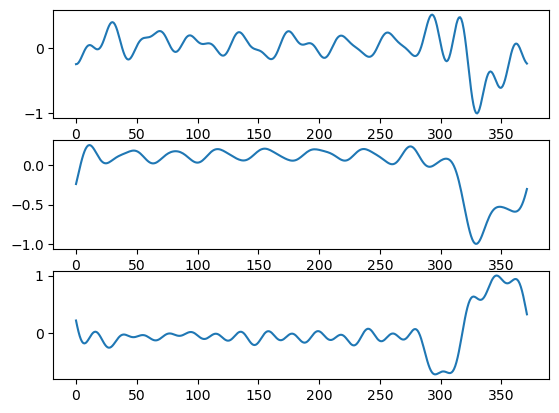

In [10]:
a = random.choice(bench)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


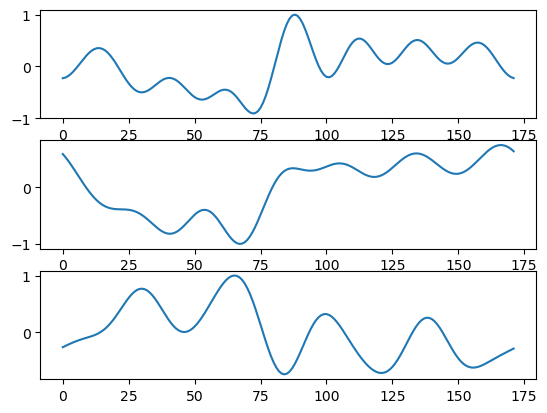

In [11]:
a = random.choice(squat)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


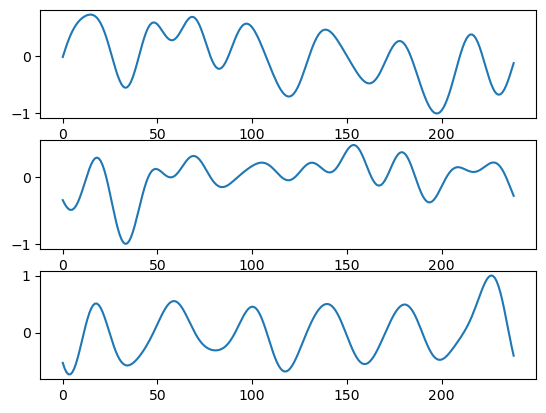

In [12]:
a = random.choice(deadlift)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


7.0

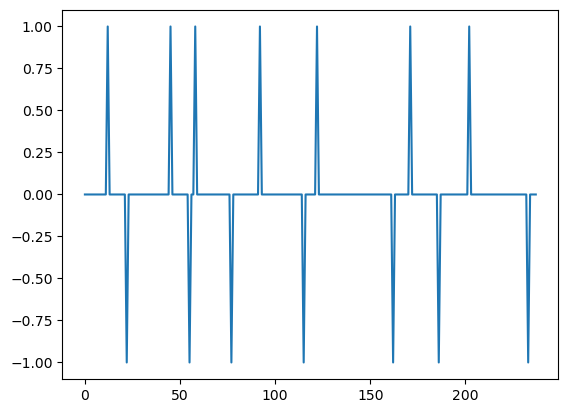

In [13]:
sig = normalize_3(a['Accel_Y'])
sig[sig > 0] = 1
sig[sig < 0] = 0
sig = np.diff(sig)
plt.plot(sig)
np.sum(np.abs(sig))/2

7.0

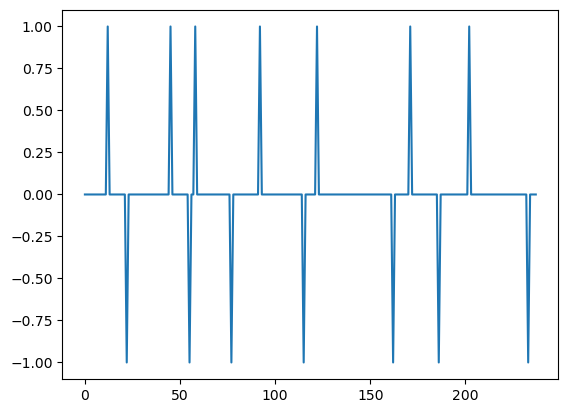

In [14]:
sig = normalize_3(a['Accel_Y'])
sig[sig > 0] = 1
sig[sig < 0] = 0
sig = np.diff(sig)
plt.plot(sig)
np.sum(np.abs(sig))/2

6.5


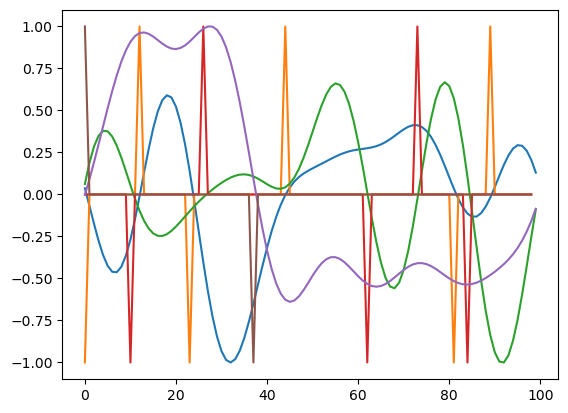

In [19]:
sig = a['Accel_Y'].to_numpy()
sig -= np.mean(sig)
interval = 100
sig = np.concatenate([sig, [sig[-1]]*(interval - len(sig)%interval)])
sig = sig.reshape((-1, interval))

r = 0
for e in sig:
    e = normalize_3(e)
    plt.plot(normalize_3(e))
    e[e > 0] = 1
    e[e < 0] = 0
    e = np.diff(e)
    plt.plot(e)
    r += np.sum(np.abs(e))/2

print(r)



In [21]:
sig = random.choice(bench)['Accel_Y'].to_numpy()
def batch(sig):
    sig -= np.mean(sig)
    interval = 100
    sig = np.concatenate([sig, [sig[-1]]*(interval - len(sig)%interval)])
    sig = sig.reshape((-1, interval))
    return sig

def normalize_3(sig, fs=10):
        
    sig = (sig - np.mean(sig))
    freqs = np.fft.fftfreq(len(sig), d=1/fs)
    fft_vals = np.fft.fft(sig)

    cutoff = 0.5
    fft_filtered = fft_vals.copy()
    fft_filtered[np.abs(freqs) > cutoff] = 0
    fft_filtered /= k
    out = np.fft.ifft(fft_filtered).real
    return out/np.max(np.abs(out))

def count(sig):
    e = sig
    e = normalize_3(e)
    e[e > 0] = 1
    e[e < 0] = 0
    e = np.diff(e)
    return np.sum(np.abs(e))/2
sig = batch(sig)
count(sig[0])

5.0

In [41]:
class Rep_Counting_Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.interval = 128
        self.kernel = tf.ones((10, 1, 1))/10
        self.values = tf.constant([0], dtype=tf.float32)

    def batch(self, sig):
        sig -= tf.reduce_mean(sig)
        interval = self.interval
        sig = tf.concat([sig, [sig[-1]]*(interval - len(sig)%interval)], axis=0)
        sig = tf.reshape(sig, (-1, interval))
        return tf.cast(sig, tf.float16)

    def normalize_3(self, sig):
        sig = tf.reshape(sig, (1, -1, 1))
        sig = tf.nn.conv1d(sig, filters=self.kernel, stride=1, padding='SAME')
        sig = tf.squeeze(sig)
        return (sig - tf.reduce_mean(sig))/tf.reduce_max(tf.abs(sig))

    
    def heaviside_custom(self, x, values):
        ones = tf.ones_like(x)
        zeros = tf.zeros_like(x)
        return tf.where(x > 0, ones, tf.where(x < 0, zeros, values))
    
    @tf.function(input_signature=[tf.TensorSpec([128], dtype=tf.float32)])    
    def call(self, sig):
        e = self.normalize_3(sig)
        e = self.heaviside_custom(e, self.values)
        e = e[1:] - e[:-1]
        return tf.reduce_sum(tf.abs(e))/2



rep_counting_model = Rep_Counting_Model()
sig = rep_counting_model.batch(bench[0]['Accel_X'].to_numpy())
sig = tf.convert_to_tensor(sig, dtype=tf.float16)
a = tf.cast(sig[0], tf.float16)
rep_counting_model(a).numpy()

6.0

In [43]:
# Get the concrete function from the tf.function-decorated call method
concrete_func = rep_counting_model.call.get_concrete_function()

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
tflite_model = converter.convert()


E0000 00:00:1745981509.987300    4496 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
I0000 00:00:1745981509.987472    4496 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1745981509.988307    4496 single_machine.cc:374] Starting new session
E0000 00:00:1745981509.989982    4496 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745981509.990029    4496 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your plat

In [45]:
with open("rep_counting_model_final.tflite", "wb") as f:
    f.write(tflite_model)

In [50]:
!xxd -i rep_counting_model_final.tflite > rep_count_model_final.h

In [85]:
def normalize_3(sig, kernel= tf.ones((10, 1, 1))/10):
    sig = tf.reshape(sig, (1, -1, 1))
    sig = tf.nn.conv1d(sig, filters=kernel, stride=1, padding='SAME')
    sig = tf.squeeze(sig)
    return (sig - tf.reduce_mean(sig))/tf.reduce_max(tf.abs(sig))

def batch(sig, interval=128):
    sig -= tf.reduce_mean(sig)
    sig = tf.concat([sig, [sig[-1]]*(interval - len(sig)%interval)], axis=0)
    sig = tf.reshape(sig, (-1, interval))
    return tf.cast(sig, tf.float16)

a = bench[0]['Accel_Y'].to_numpy(dtype=np.float32)
a = normalize_3(a)
a = batch(a)

In [203]:
x_train, y_train, x_test, y_test = [], [], [], []
for e in bench:
    temp = []
    for label in axes:
        t = e[label].to_numpy(dtype=np.float32)
        t = t[:-1]
        t = normalize_3(t)
        t = batch(t, 32)
        temp.append(t)
    temp = (np.array(temp))
    k = temp.shape[1]
    x_train.extend(list(tf.constant(temp[:, i, :], dtype=tf.float32) for i in range(k)))
    y_train.extend(['bench']*k)

for e in squat:
    temp = []
    for label in axes:
        t = e[label].to_numpy(dtype=np.float32)
        t = t[:-1]
        t = normalize_3(t)
        t = batch(t, 32)
        temp.append(t)
    temp = (np.array(temp))
    k = temp.shape[1]
    x_train.extend(list(tf.constant(temp[:, i, :], dtype=tf.float32) for i in range(k)))
    y_train.extend(['squat']*k)


for e in deadlift:
    temp = []
    for label in axes:
        t = e[label].to_numpy(dtype=np.float32)
        t = t[:-1]
        t = normalize_3(t)
        t = batch(t,32)
        temp.append(t)
    temp = (np.array(temp))
    k = temp.shape[1]
    x_train.extend(list(tf.constant(temp[:, i, :], dtype=tf.float32) for i in range(k)))
    y_train.extend(['deadlift']*k)


In [204]:
from sklearn.model_selection import train_test_split

train_x, train_y, test_x, test_y = train_test_split(x_train, y_train, test_size=10/75, shuffle=True)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
x_train = tf.constant(np.stack([x.numpy() for x in x_train], axis=0), dtype=tf.float16)


In [207]:

def build_cnn(input_shape=(6, 32), num_classes=3):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Reshape((6, 32, 1)),

        tf.keras.layers.Conv2D(32, (6, 6), activation='relu', padding='same'),
        #tf.keras.layers.MaxPooling2D((6, 3)),

        tf.keras.layers.Conv2D(64, (6, 6), activation='relu', padding='same'),
        #tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = build_cnn()
model.summary()
model.fit(x_train, y_train, epochs=5, batch_size=1,validation_split=0.2)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_32 (Reshape)            │ (None, 6, 32, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 6, 32, 32)      │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 6, 32, 64)      │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │       393,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,323 (1.79 MB)

 Trainable params: 468,323 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5670 - loss: 0.9420 - val_accuracy: 0.7115 - val_loss: 0.6228
Epoch 2/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8367 - loss: 0.4201 - val_accuracy: 0.7500 - val_loss: 0.6873
Epoch 3/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9586 - loss: 0.1626 - val_accuracy: 0.8077 - val_loss: 0.5199
Epoch 4/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9709 - loss: 0.1260 - val_accuracy: 0.7500 - val_loss: 0.6441
Epoch 5/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9870 - loss: 0.0516 - val_accuracy: 0.8654 - val_loss: 0.3809
